<h1>CG2020 - Tarefa 2</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pim
from scipy import fftpack
from skimage import data,filters
from skimage import io
from PIL import Image
%matplotlib notebook

path = ''
my_name = 'FelipeHolanda_HeloisaPessoa'

<IPython.core.display.Javascript object>


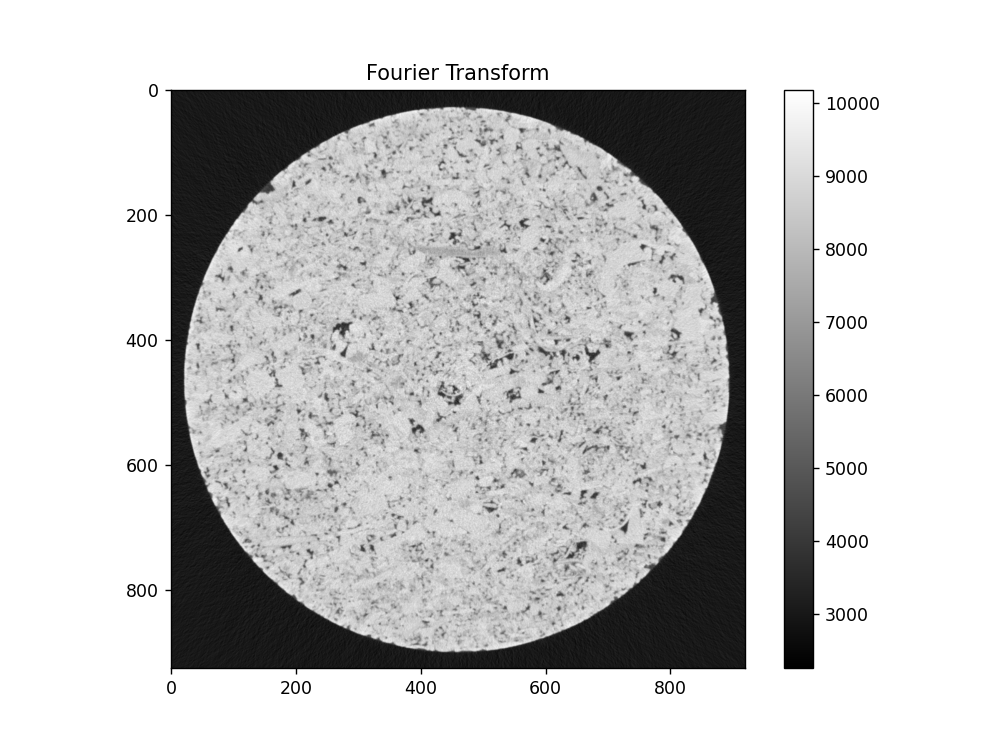

In [2]:
img = pim.imread(path + 'antes0900.tiff')

def show_img(title, _img):
    plt.figure(figsize=(8,6))
    plt.title(title)
    if _img.ndim == 2:
        plt.imshow(_img, cmap = 'gray')
    else:
        plt.imshow(_img)
    plt.show()
    plt.colorbar()
    
show_img('antes0900.tiff', img)

In [3]:
from matplotlib.colors import LogNorm

def plot_spectrum(im_fft, title):
    plt.title(title)
    plt.figure(figsize=(8,4))
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    

<IPython.core.display.Javascript object>


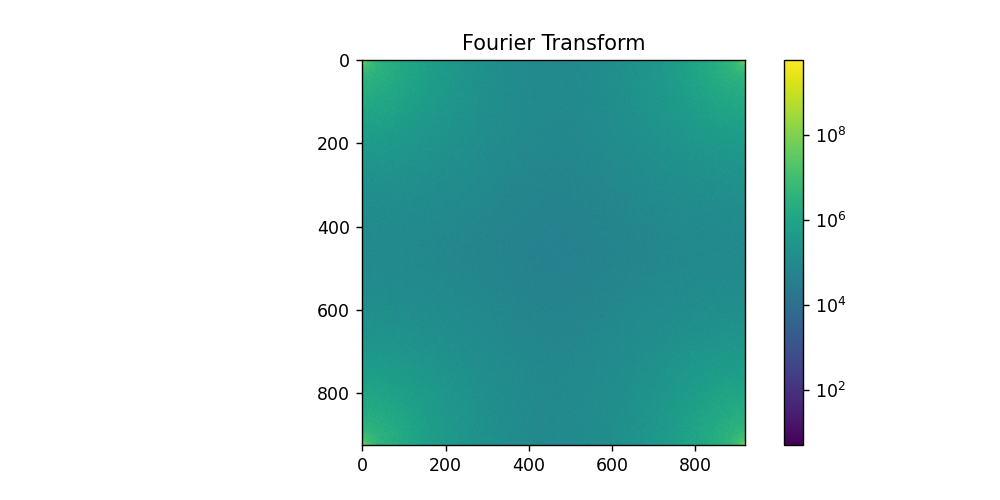

In [4]:
from scipy import fftpack
im_fft = fftpack.fft2(img)

plot_spectrum(im_fft, 'Fourier Transform')

In [5]:
im_fft_shift = fftpack.fftshift(im_fft)

<IPython.core.display.Javascript object>


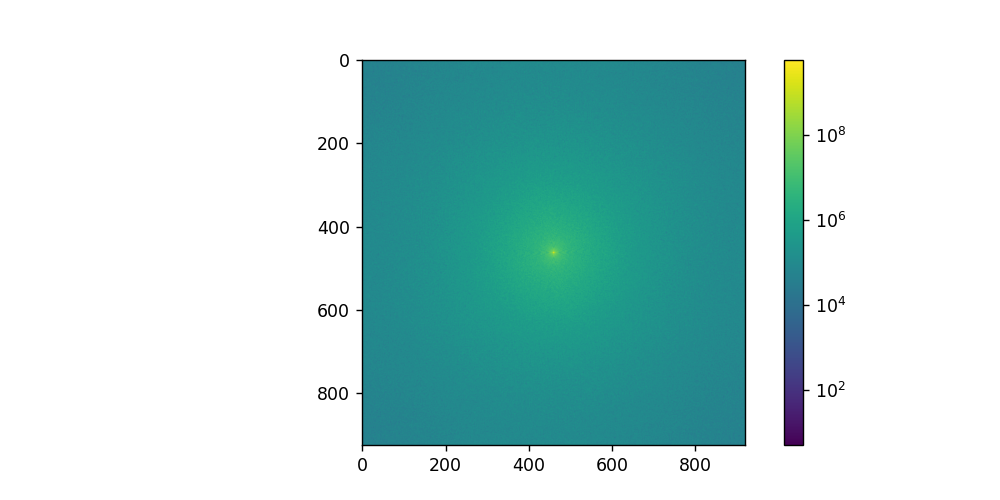

In [6]:
plot_spectrum(im_fft_shift, 'Fourier Transform')

<IPython.core.display.Javascript object>


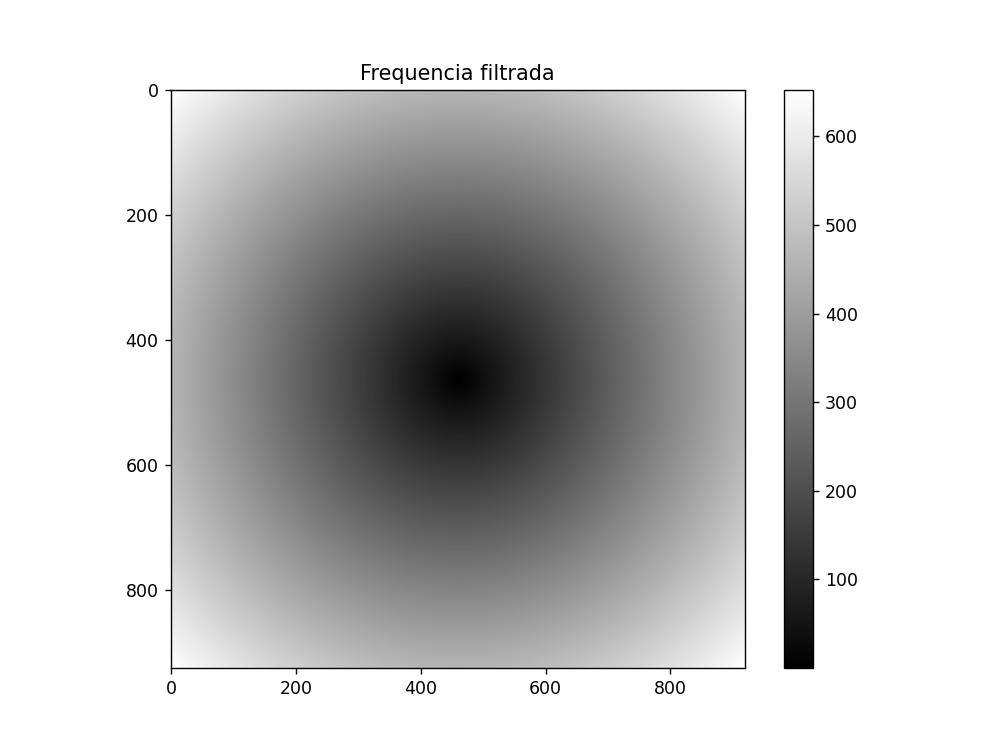

In [7]:
h, w = img.shape[:2]
Y, X = np.ogrid[0 : h, 0 : w]
mask = np.sqrt((X - w / 2) ** 2 + (Y - h / 2)**2)

show_img('SSSZ', mask)

<IPython.core.display.Javascript object>


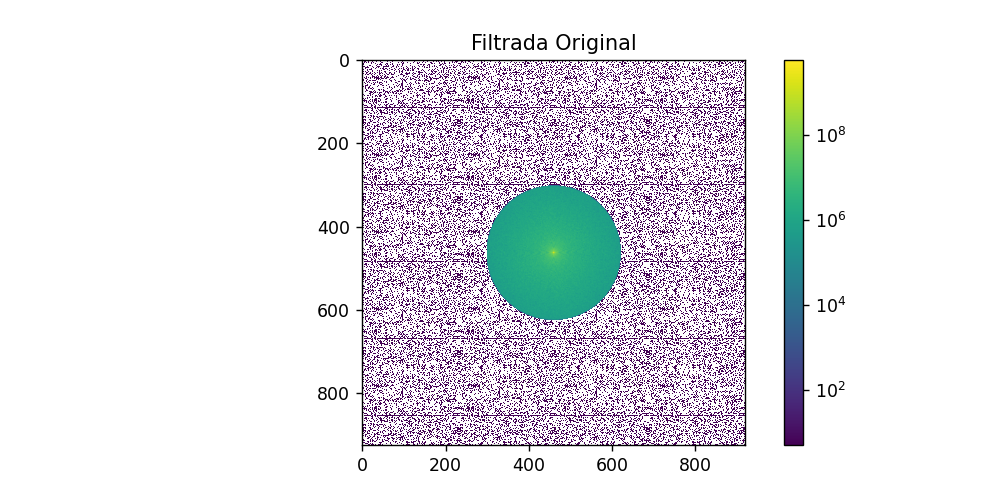

In [8]:
im_fft_shift = fftpack.fftshift(im_fft)
im_fft_shift[mask > 160] = 0
plot_spectrum(im_fft_shift, 'Frequencia filtrada')

<IPython.core.display.Javascript object>


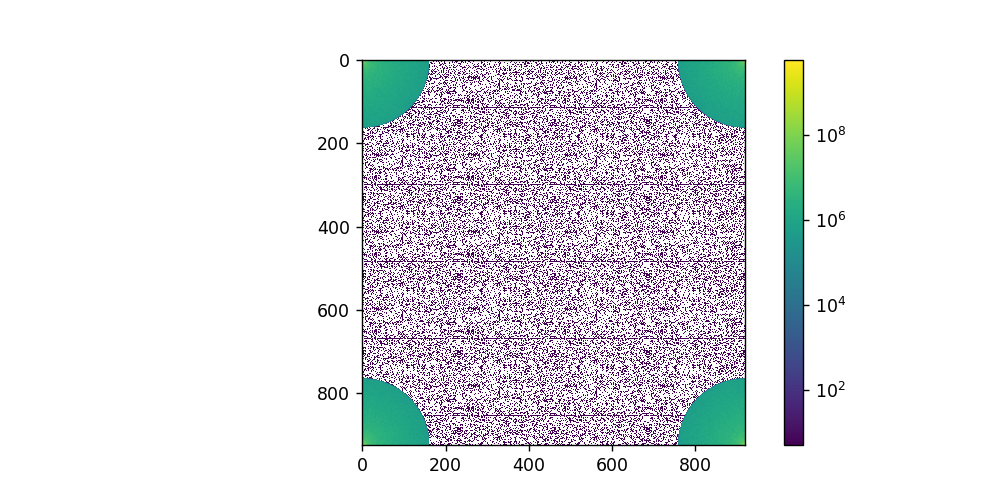

In [9]:
im_fft_2 = fftpack.ifftshift(im_fft_shift)

plot_spectrum(im_fft_2, 'Filtrada Original')

<IPython.core.display.Javascript object>


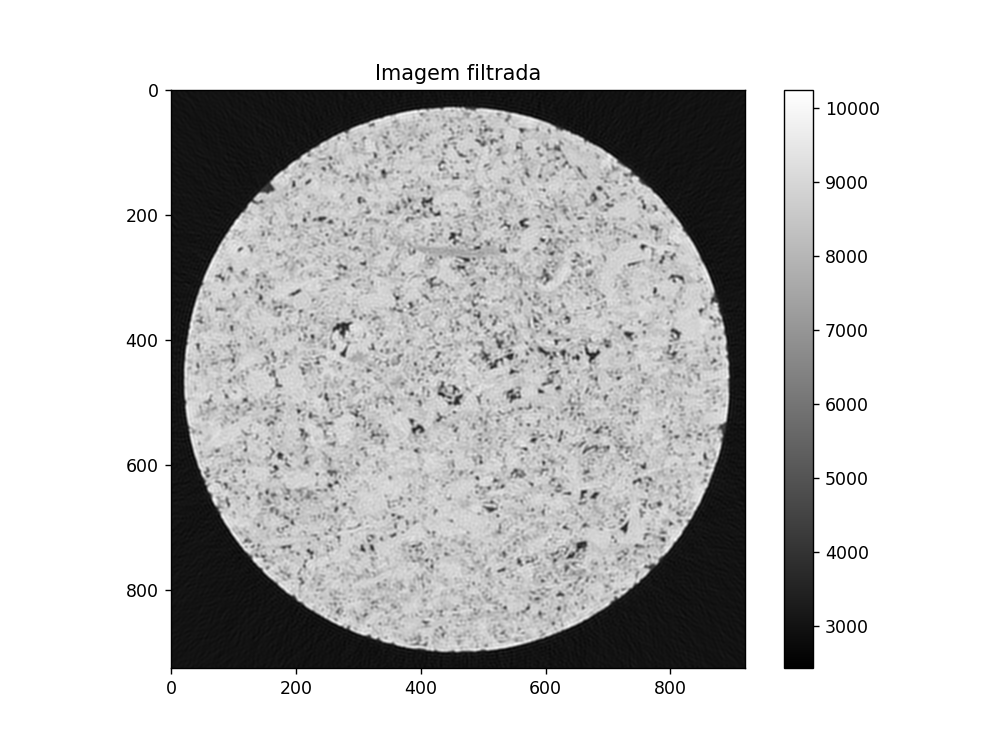

In [10]:
im_2 = fftpack.ifft2(im_fft_2).real
show_img('Imagem filtrada', im_2)

<IPython.core.display.Javascript object>


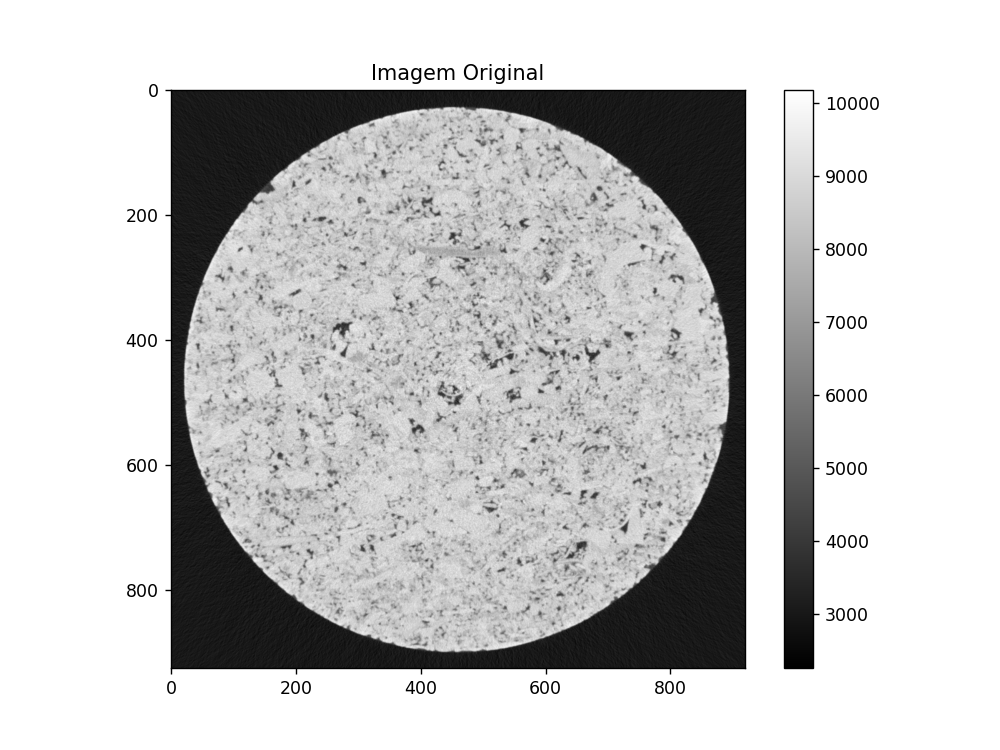

In [11]:
show_img("Imagem Original", img)

In [12]:
img2 = io.imread(path + 'antes0900.tiff')
h, w = img.shape[:2]

def show_hist(title,img):
    plt.figure(figsize=(6,4))
    plt.title(title)
    _ = plt.hist(img.ravel(), 255)
    plt.show()

<IPython.core.display.Javascript object>


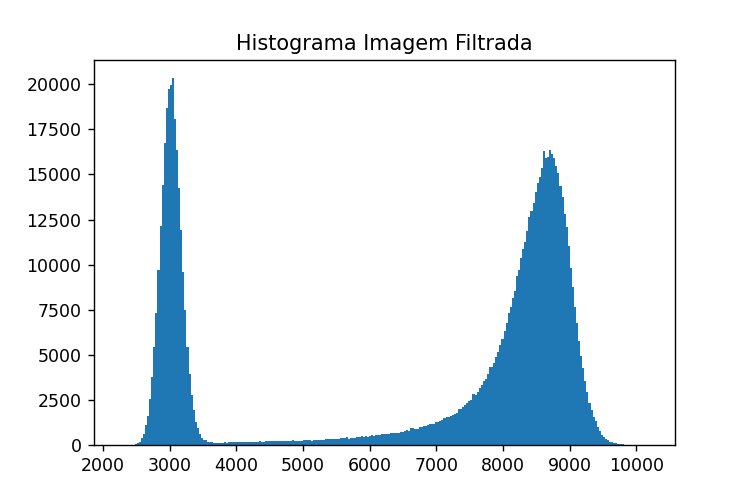

In [13]:
show_hist('Histograma Imagem Filtrada',img2)

In [14]:
im_2 = im_2.astype('float32')
im2 = np.array(im_2)
im2max = im2.max()
im2 = im2/im2max
h, w = im_2.shape

<IPython.core.display.Javascript object>


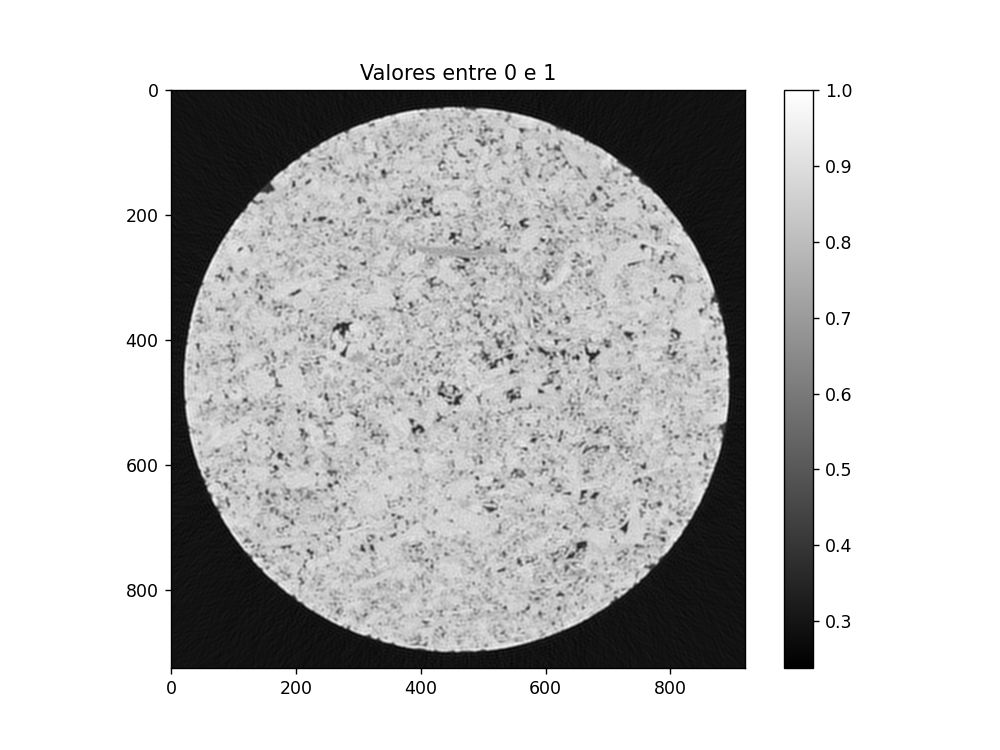

In [15]:
show_img('Valores entre 0 e 1',im2)

In [16]:
def define_pixel(img,h,w):
    i = 0;
    j = 0;
    result = np.array(img)
    legenda = np.array(img)
    for i in range(h):
        for j in range(w):
            if img[i,j] <= 0.4:
                result[i,j] = 0 #vazio
            if 0.25 < img[i,j] <= 0.6: 
                result[i,j] = 1 #porosidade baixa
            if 0.5 < img[i,j] <= 0.8: 
                result[i,j] = 2 #porosidade média
            if img[i,j] > 0.8:
                result[i,j] = 3 #porosidade alta
    return result


result = define_pixel(im2,h,w)


<IPython.core.display.Javascript object>


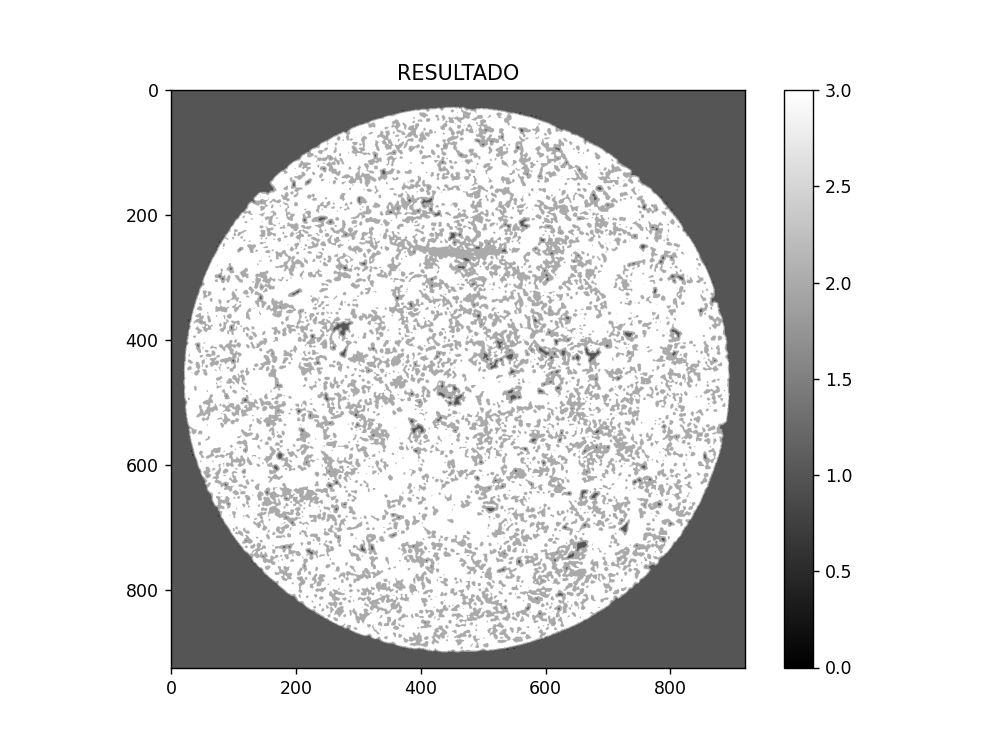

In [17]:
show_img('RESULTADO', result)

<IPython.core.display.Javascript object>


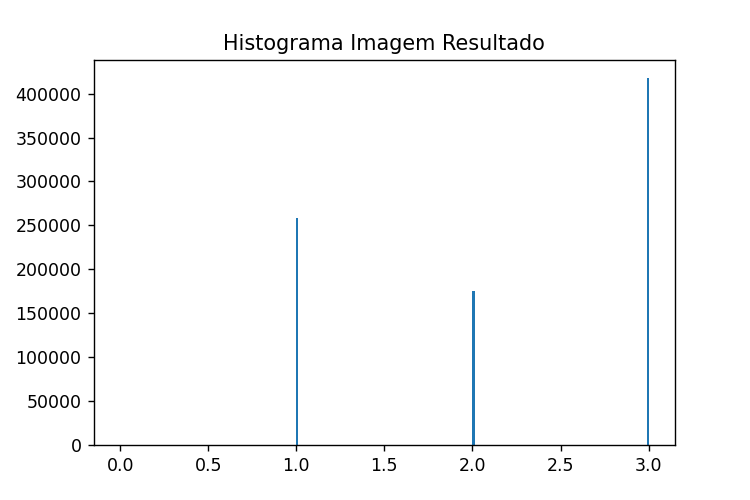

In [18]:
show_hist('Histograma Imagem Resultado',result)